# Sources of uncertainty in supervised learning

Uncertainty occurs in various facets in machine learning, and different settings and learning problems will usually require a different handling from an uncertainty modeling point of view. In this paper, we focus on the standard setting of supervised learning (cf.\ Fig.\ \ref{fig:setting}), which we briefly recall in this section. Moreover, we identify different sources of (predictive) uncertainty in this setting.


## Supervised learning and predictive uncertainty


In supervised learning, a learner is given access to a set of training data
 
<a id="eq-td"></a>
$$
\mathcal{D} := \big\{ (\vec{x}_1 , y_1 ), \ldots , (\vec{x}_N , y_N ) \big\} \subset \mathcal{X} \times \mathcal{Y} 
$$


where $\mathcal{X}$ is an instance space and $\mathcal{Y}$ the set of outcomes that can be associated with an instance. Typically, the training examples $(\vec{x}_i , y_i)$ are assumed to be independent and identically distributed (i.i.d.) according to some unknown probability measure $P$ on $\mathcal{X} \times \mathcal{Y}$. Given a hypothesis space $\mathcal{H}$ (consisting of hypotheses $h:\, \mathcal{X} \longrightarrow \mathcal{Y}$ mapping instances $\vec{x}$ to outcomes $y$) and a loss function $\ell: \, \mathcal{Y} \times \mathcal{Y} \longrightarrow \mathbb{R}$, the goal of the learner is to induce a hypothesis $h^* \in \mathcal{H}$ with low risk (expected loss)
\begin{equation}
R(h) := \int_{\mathcal{X} \times \mathcal{Y}} \ell( h(\vec{x}) , y) \, d \, P(\vec{x} , y) 
\end{equation}
Thus, given the training data $\mathcal{D}$, the learner needs to "guess" a good hypothesis $h$. This choice is commonly guided by the empirical risk 
\begin{equation}
R_{emp}(h) :=  \frac{1}{N} \sum_{i=1}^N \ell(h(\vec{x}_i) , y_i) 
\end{equation}

In [9]:
# Example loss function: Squared error loss
def loss(h_x, y):
    return (h_x - y) ** 2

# Empirical risk function
def empirical_risk(h, X, Y):
    N = len(Y)
    total_loss = 0
    for i in range(N):
        total_loss += loss(h(X[i]), Y[i])
    return total_loss / N

i.e., the performance of a hypothesis on the training data. However, since $R_{emp}(h)$ is only an estimation of the true risk $R(h)$, the hypothesis (empirical risk minimizer) 

<a id="eq-argerm"></a>
$
\hat{h} := \arg\min_{h \in \mathcal{H}} R_{emp}(h)
$

favored by the learner will normally not coincide with the true risk minimizer

<a id="eq:bayespred"></a>
$
h^* := \operatorname{argmin}_{h \in \mathcal{H}} R(h)
$

In the following code example, we illustrate the difference between the hypothesis (empirical risk minimizer) and the true risk minimizer. $100$ points are generated for the interval between $-10$ and $10$, following a normal distribution. Here, the two large dots represent the minima in both risks."

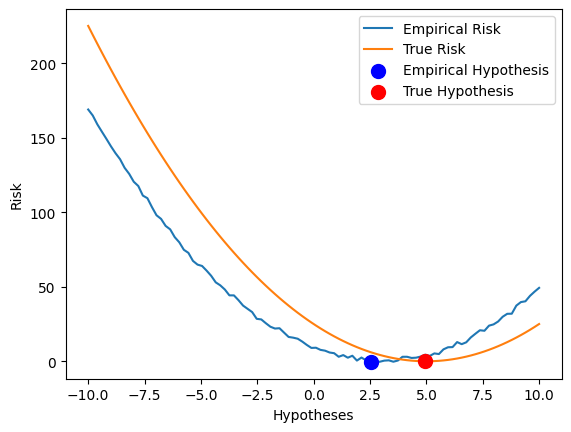

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define a set of hypotheses
hypotheses = np.linspace(-10, 10, 100)

# Empirical risk function with added noise
def R_emp(h):
    return (h - 3) ** 2 + np.random.normal(0, 1)

# True risk function without noise
def R_true(h):
    return (h - 5) ** 2

# Find the hypothesis that minimizes empirical risk
empirical_risks = np.array([R_emp(h) for h in hypotheses])
h_hat = hypotheses[np.argmin(empirical_risks)]

# Find the hypothesis that minimizes true risk
true_risks = np.array([R_true(h) for h in hypotheses])
h_star = hypotheses[np.argmin(true_risks)]

# Plotting to visualize
plt.plot(hypotheses, empirical_risks, label="Empirical Risk")
plt.plot(hypotheses, true_risks, label="True Risk")
plt.scatter([h_hat], [R_emp(h_hat)], color='b', s=100, zorder=5, label="Empirical Hypothesis")
plt.scatter([h_star], [R_true(h_star)], color='r', s=100, zorder=5, label="True Hypothesis")
plt.xlabel("Hypotheses")
plt.ylabel("Risk")
plt.legend()
plt.show()



Correspondingly, there remains uncertainty regarding $h^*$ as well as the approximation quality of $\hat h$ (in the sense of its proximity to $h^*$) and its true risk $R(\hat h)$.

:::{figure-md} text-image
<img src="pic-sl-setting.jpg" alt="The basic setting of supervised learning" width="700">

The basic setting of supervised learning: A hypothesis $\hat{h} \in \mathcal{H}$ is induced from the training data $\mathcal{D}$ and used to produce predictions for new query instances $\vec{x} \in \mathcal{X}$.
::: 

Eventually, one is often interested in predictive uncertainty, i.e., the uncertainty related to the prediction $\hat y_{q}$ for a concrete query instance $\vec{x}_{q} \in \mathcal{X}$. In other words, given a partial observation $(\vec{x}_{q} , \cdot)$, we are wondering what can be said about the missing outcome, especially about the uncertainty related to a prediction of that outcome. Indeed, estimating and quantifying uncertainty in a transductive way, in the sense of tailoring it for individual instances, is arguably important and practically more relevant than a kind of average accuracy or confidence, which is often reported in machine learning. In medical diagnosis, for example, a patient will be interested in the reliability of a test result in her particular case, not in the reliability of the test on average. This view is also expressed, for example, by ({cite:t}`kull_rm14`) : "Being able to assess the reliability of a probability score for each instance is much more powerful than assigning an aggregate reliability score [...] independent of the instance to be classified." 


Emphasizing the transductive nature of the learning process, the learning task could also be formalized as a problem of predictive inference as follows:  Given a set (or sequence) of data points $(X_1, Y_1), \ldots , (X_N, Y_N)$ and a query point $X_{N+1}$, what is the associated outcome $Y_{N+1}$? Here, the data points are considered as (realizations of) random variables\footnote{whence they are capitalized here}, which are commonly assumed to be independent and identically distributed (i.i.d.). A prediction could be given in the form of a point prediction $\hat{Y}_{N+1} \in \mathcal{Y}$, but also (and perhaps preferably)  in the form of a predictive set $\hat{C}(X_{N+1}) \subseteq \mathcal{Y}$ that is likely to cover the true outcome, for example an interval in the case of regression (cf.\ Sections \ref{sec:cp} and \ref{sec:sbus}). Regarding the aspect of uncertainty, different properties of $\hat{C}(X_{N+1})$ might then be of interest. For example, coming back to the discussion from the previous paragraph, a basic distinction can be made between a statistical guarantee for marginal coverage, namely $P( Y_{N+1} \in \hat{C}(X_{N+1}) ) \geq 1 - \delta$ for a (small) threshold $\delta > 0$, and conditional coverage, namely
 
\begin{equation}
P \Big( Y_{N+1} \in \hat{C}(X_{N+1}) \in X_{N+1} = \vec{x} \Big) \geq 1 - \delta \quad \text{ for (almost) all } \vec{x} \in \mathcal{X} \, .
\end{equation}

Roughly speaking, in the case of marginal coverage, one averages over both $X_{N+1}$ and $Y_{N+1}$ (i.e., the probability $P$ refers to a joint measure on $\mathcal{X} \times \mathcal{Y}$), while in the case of conditional coverage, $X_{N+1}$ is fixed and the average in taken over $Y_{N+1}$ only ([Barber et al., 2020](#cite-barb_tl20)). Note that predictive inference as defined here does not necessarily require the induction of a hypothesis $\hat h$ in the form of a (global) map $\mathcal{X} \longrightarrow \mathcal{Y}$, i.e., the solution of an induction problem. While it is true that transductive inference can be realized via inductive inference (i.e., by inducing a hypothesis $\hat h$ first and then producing a prediction $\hat{Y}_{N+1} = \hat h(X_{N+1})$ by applying this hypothesis to the query $X_{N+1}$), one should keep in mind that induction is a more difficult problem than transduction ([Vapnik, 1998](#cite-vapn_sl98)).

##  Sources of uncertainty


:::{figure-md} image-typewriter-keyboard
<div style="text-align: center;">
  <img src="pic-approx.jpg" alt="Different types of uncertainties" width="20%" style="display: inline-block; margin-right: 20px;">
  <img src="Table-sourceUQ.jpg" alt="Table" width="33%" style="display: inline-block; margin-left: 20px;">
  </div>
  Different types of uncertainties related to different types of discrepancies and approximation errors:  $f^*$ is the pointwise Bayes predictor, $h^*$ is the best predictor within the hypothesis space, and $\hat{h}$ the predictor produced by the learning algorithm.



As the prediction $\hat{y}_{q}$ constitutes the end of a process that consists of different learning and approximation steps, all errors and uncertainties related to these steps may also contribute to the uncertainty about $\hat{y}_{q}$ (cf. [Fig. 1](#fig-approx)):

Since the dependency between $\mathcal{X}$ and $\mathcal{Y}$ is typically non-deterministic, the description of a new prediction problem in the form of an instance $\vec{x}_{q}$ gives rise to a conditional probability distribution

$$
P(y \in \vec{x}_{q}) = \frac{P(\vec{x}_{q}, y)}{P(\vec{x}_q)}
\quad 
$$

on $\mathcal{Y}$, but it does not normally identify a single outcome $y$ in a unique way. Thus, even given full information in the form of the measure $P$ (and its density $P$), uncertainty about the actual outcome $y$ remains. This uncertainty is of an aleatoric nature. In some cases, the distribution (Equation 1) itself (called the predictive posterior distribution in Bayesian inference) might be delivered as a prediction. Yet, when being forced to commit to point estimates, the best predictions (in the sense of minimizing the expected loss) are prescribed by the pointwise Bayes predictor $f^*$, which is defined by

$$
f^*(\vec{x}) := \arg\min_{\hat{y} \in \mathcal{Y}} \int_{\mathcal{Y}} \ell(y, \hat{y}) \, dP(y \in \vec{x})
\quad 
$$

for each $\vec{x} \in \mathcal{X}$.

The Bayes predictor (Equation 2) does not necessarily coincide with the pointwise Bayes predictor (Equation 3). This discrepancy between $h^*$ and $f^*$ is connected to the uncertainty regarding the right type of model to be fit, and hence the choice of the hypothesis space $\mathcal{H}$ (which is part of what is called "background knowledge" in [Fig. 2](#fig-setting)). We shall refer to this uncertainty as model uncertainty. Thus, due to this uncertainty, one cannot guarantee that $h^*(\vec{x}) = f^*(\vec{x})$, or, in case the hypothesis $h^*$ (e.g., a probabilistic classifier) delivers probabilistic predictions $P(y \mid \vec{x}, h^*)$ instead of point predictions, that $P(\cdot \mid \vec{x}, h^*) = P(\cdot \mid \vec{x})$.

The hypothesis $\hat{h}$ produced by the learning algorithm, for example the empirical risk minimizer (Equation 3), is only an estimate of $h^*$, and the quality of this estimate strongly depends on the quality and the amount of training data. We shall refer to the discrepancy between $\hat{h}$ and $h^*$, i.e., the uncertainty about how well the former approximates the latter, as approximation uncertainty.


## Reducible versus irreducible uncertainty

As already said, one way to characterize uncertainty as aleatoric or epistemic is to ask whether or not the uncertainty can be reduced through additional information: Aleatoric uncertainty refers to the irreducible part of the uncertainty, which is due to the non-deterministic nature of the sought input/output dependency, that is, to the stochastic dependency between instances $\vec{x}$ and outcomes $y$, as expressed by the conditional probability (\ref{eq:ccp}). Model uncertainty and approximation uncertainty, on the other hand, are subsumed under the notion of epistemic uncertainty, that is, uncertainty due to a lack of knowledge about the perfect predictor (\ref{eq:pointbayespred}), for example caused by uncertainty about the parameters of a model. In principle, this uncertainty can be reduced. 



This characterization, while evident at first sight, may appear somewhat blurry upon closer inspection.
What does "reducible" actually mean? An obvious source of additional information is the training data $\mathcal{D}$: The learner's uncertainty can be reduced by observing more data, while the setting of the learning problem\,---\,the instance space $\mathcal{X}$, output space $\mathcal{Y}$, hypothesis space $\mathcal{H}$, joint probability $P$ on $\mathcal{X} \times \mathcal{Y}$\,---\,remains fixed. In practice, this is of course not always the case. Imagine, for example, that a learner can decide to extend the description of instances by additional features, which essentially means replacing the current instance space $\mathcal{X}$ by another space $\mathcal{X´}$. This change of the setting may have an influence on uncertainty. An example is shown in Fig.\ \ref{fig:dimen}: In a low-dimensional space (here defined by a single feature $x_1$), two class distributions are overlapping, which causes (aleatoric) uncertainty in a certain region of the instance space. By embedding the data in a higher-dimensional space (here accomplished by adding a second feature $x_2$), the two classes become separable, and the uncertainty can be resolved. More generally, embedding data in a higher-dimensional space will reduce aleatoric and increase epistemic uncertainty, because fitting a model will become more difficult and require more data. 


:::{figure-md} Overlapping-Classes
<div style="text-align: center;">
  <img src="pic-dim-1.jpg" alt="Overlapping Classes" width="33%" style="display: inline-block; margin-right: 20px;">
  <img src="pic-dim-2.jpg" alt="Separable Classes in Higher Dimension" width="33%" style="display: inline-block; margin-left: 20px;">
  </div>
  Left: The two classes are overlapping, which causes (aleatoric) uncertainty in a certain region of the instance space. Right: By adding a second feature, and hence embedding the data in a higher-dimensional space, the two classes become separable, and the uncertainty can be resolved. The two classes are overlapping in the left image, causing (aleatoric) uncertainty. In the right image, by adding a second feature and embedding the data in a higher-dimensional space, the two classes become separable, resolving the uncertainty.


Now, let's consider a concrete example. Doctors often encounter similar diseases, making it challenging to differentiate between them based on a few parameters alone. This is called differential diagnosis. In this scenario, a doctor is trying to distinguish between two diseases based on three factors: creatine kinase (CK) level, the troponin level at 3 hours, and the difference in troponin levels between 3 and 6 hours, which should be higher than 10% if it is a heart attack. Relying solely on the CK level could be misleading in the diagnosis of the diseases, and using only the first two parameters (CK and troponin at 3 hours) might not provide a definitive answer with 100% certainty. Therefore, the doctor must also consider the patient's delta troponin after 6 hours. By incorporating this additional parameter, the uncertainty in diagnosis based on just two parameters is reduced. Here, a total of 100 data points per disease are randomly generated, following normal distributions with means in the thresholds that differentiate both diseases. The dots are samples representing the measurements performed on different patients.

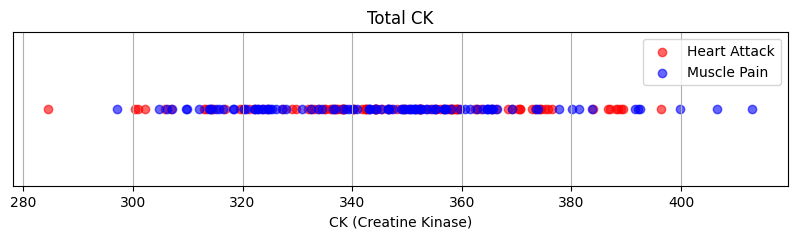

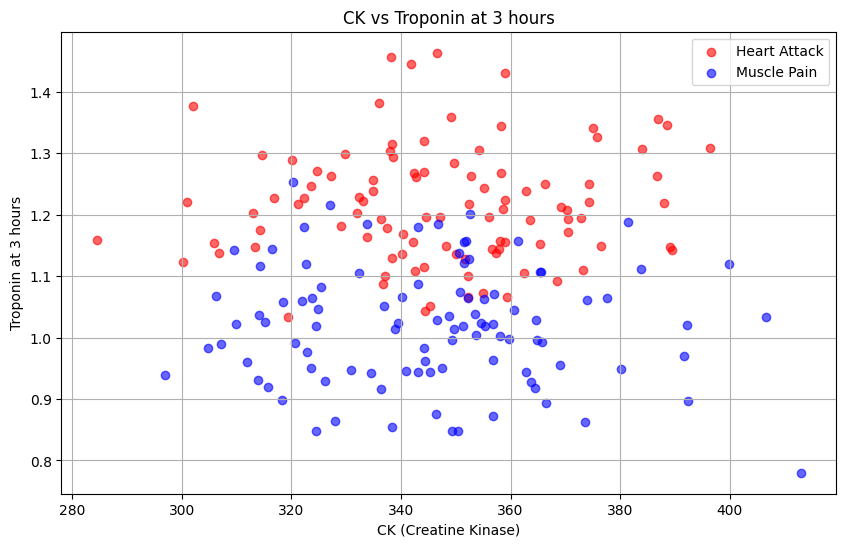

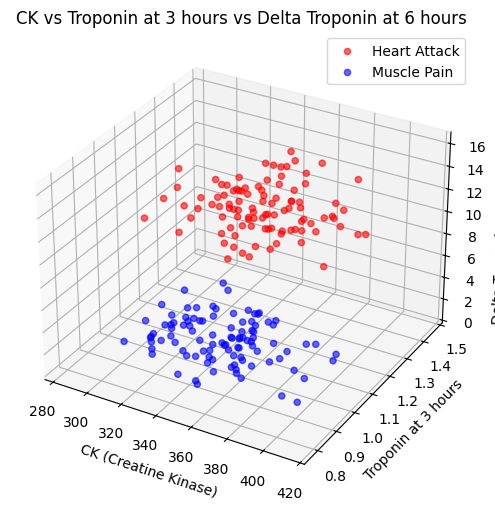

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate simulated data
np.random.seed(42)

# Increase the number of points
n_points = 100

# Generate simulated values for CK (closer between heart attack and muscle pain)
ck_heart_attack = np.random.normal(350, 25, n_points)  # CK for heart attack
ck_muscle_pain = np.random.normal(345, 25, n_points)  # CK for muscle pain

# Generate times (in hours)
times = np.linspace(0, 6, n_points)

# Generate simulated values for troponin (closer between heart attack and muscle pain)
# For heart attack
initial_troponin_heart_attack = np.random.normal(0.5, 0.05, n_points)
troponin_3h_heart_attack = initial_troponin_heart_attack + 0.2 * 3 + np.random.normal(0, 0.05, n_points)
troponin_6h_heart_attack = troponin_3h_heart_attack + initial_troponin_heart_attack * np.random.uniform(0.2, 0.3, n_points)  # Ensure >20% increase
delta_troponin_heart_attack = ((troponin_6h_heart_attack - troponin_3h_heart_attack) / troponin_3h_heart_attack) * 100

# For muscle pain
initial_troponin_muscle_pain = np.random.normal(0.5, 0.05, n_points)
troponin_3h_muscle_pain = initial_troponin_muscle_pain + 0.01 * 3 + np.random.normal(0, 0.05, n_points)
troponin_6h_muscle_pain = troponin_3h_muscle_pain + initial_troponin_muscle_pain * np.random.uniform(0.01, 0.04, n_points)  # Ensure <10% increase
delta_troponin_muscle_pain = ((troponin_6h_muscle_pain - troponin_3h_muscle_pain) / troponin_3h_muscle_pain) * 100

# Adjust to make the points closer but with some overlap on the Y-axis
troponin_3h_heart_attack = np.random.normal(1.2, 0.1, n_points)
troponin_3h_muscle_pain = np.random.normal(1.0, 0.1, n_points)

# Plot in 1 Dimension: Total CK
plt.figure(figsize=(10, 2))
plt.scatter(ck_heart_attack, np.zeros(n_points), color='red', label='Heart Attack', alpha=0.6)
plt.scatter(ck_muscle_pain, np.zeros(n_points), color='blue', label='Muscle Pain', alpha=0.6)
plt.yticks([])
plt.xlabel('CK (Creatine Kinase)')
plt.title('Total CK')
plt.legend()
plt.grid(True)
plt.show()

# Plot in 2 Dimensions: CK vs Troponin at 3 hours (closer on the Y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(ck_heart_attack, troponin_3h_heart_attack, color='red', label='Heart Attack', alpha=0.6)
plt.scatter(ck_muscle_pain, troponin_3h_muscle_pain, color='blue', label='Muscle Pain', alpha=0.6)
plt.xlabel('CK (Creatine Kinase)')
plt.ylabel('Troponin at 3 hours')
plt.title('CK vs Troponin at 3 hours')
plt.legend()
plt.grid(True)
plt.show()

# Plot in 3 Dimensions: CK vs Troponin at 3 hours vs Delta Troponin at 6 hours (separated classes)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ck_heart_attack, troponin_3h_heart_attack, delta_troponin_heart_attack, color='red', label='Heart Attack', alpha=0.6)
ax.scatter(ck_muscle_pain, troponin_3h_muscle_pain, delta_troponin_muscle_pain, color='blue', label='Muscle Pain', alpha=0.6)
ax.set_xlabel('CK (Creatine Kinase)')
ax.set_ylabel('Troponin at 3 hours')
ax.set_zlabel('Delta Troponin at 6 hours (%)')
ax.set_title('CK vs Troponin at 3 hours vs Delta Troponin at 6 hours')
ax.legend()
plt.show()


What this example shows is that aleatoric and epistemic uncertainty should not be seen as absolute notions. Instead, they are context-dependent in the sense of depending on the setting $(\mathcal{X}, \mathcal{Y}, \mathcal{H}, P)$. Changing the context will also change the sources of uncertainty: aleatoric may turn into epistemic uncertainty and vice versa. Consequently, by allowing the learner to change the setting, the distinction between these two types of uncertainty will be somewhat blurred (and their quantification will become even more difficult). This view of the distinction between aleatoric and epistemic uncertainty is also shared by ({cite:t}`kiur_ao09`), who note that "these concepts only make unambiguous sense if they are defined within the confines of a model of analysis", and that "In one model an addressed uncertainty may be aleatory, in another model it may be epistemic."

## Approximation and model uncertainty

Assuming the setting $(\mathcal{X}, \mathcal{Y}, \mathcal{H}, P)$ to be fixed, the learner's lack of knowledge will essentially depend on the amount of data it has seen so far: The larger the number $N = |\mathcal{D}|$ of observations, the less ignorant the learner will be when having to make a new prediction. In the limit, when $N \rightarrow \infty$, a consistent learner will be able to identify $h^*$ (see [Fig. 1](#fig-u) for an illustration), i.e., it will get rid of its approximation uncertainty.


:::{figure-md} Aleatoric-Uncertainty
<div style="text-align: center;">
  <img src="pic-au.jpg" alt="Aleatoric Uncertainty" width="33%" style="display: inline-block; margin-right: 20px;">
  </div>
  <img src="pic-eu.jpg" alt="Epistemic Uncertainty" width="33%" style="display: inline-block; margin-left: 20px;">
 The two classes are overlapping in the left image, causing (aleatoric) uncertainty. In the right image, by adding a second feature and embedding the data in a higher-dimensional space, the two classes become separable, resolving the uncertainty.
 :::


What is (implicitly) assumed here is a correctly specified hypothesis space $\mathcal{H}$, such that $f^* \in \mathcal{H}$. In other words, model uncertainty is simply ignored. For obvious reasons, this uncertainty is very difficult to capture, let alone quantify. In a sense, a kind of meta-analysis would be required: Instead of expressing uncertainty about the ground-truth hypothesis $h$ within a hypothesis space $\mathcal{H}$, one has to express uncertainty about which $\mathcal{H}$ among a set $\mathbb{H}$ of candidate hypothesis spaces might be the right one. Practically, such kind of analysis does not appear to be feasible. On the other side, simply assuming a correctly specified hypothesis space $\mathcal{H}$ actually means neglecting the risk of model misspecification. To some extent, this appears to be unavoidable, however. In fact, the learning itself as well as all sorts of inference from the data are normally done under the assumption that the model is valid. Otherwise, since some assumptions are indeed always needed, it will be difficult to derive any useful conclusions.

As an aside, let us note that these assumptions, in addition to the nature of the ground truth $f^*$, also include other (perhaps more implicit) assumptions about the setting and the data-generating process. For example, imagine that a sudden change of the distribution cannot be excluded, or a strong discrepancy between training and test data ([Malisiewicz et al., 2018](#cite-mali_pu18)). Not only prediction but also the assessment of uncertainty would then become difficult, if not impossible. Indeed, if one cannot exclude something completely unpredictable to happen, there is hardly any way to reduce predictive uncertainty. To take a simple example, (epistemic) uncertainty about the bias of a coin can be estimated and quantified, for example in the form of a confidence interval, from an i.i.d.\ sequence of coin tosses. But what if the bias may change from one moment to the other (e.g., because the coin is replaced by another one), or another outcome becomes possible (e.g., "invalid" if the coin has not been tossed in agreement with a new execution rule)? While this example may appear a bit artificial, there are indeed practical classification problems in which certain classes $y \in \mathcal{Y}$ may "disappear" while new classes emerge, i.e., in which $\mathcal{Y}$ may change in the course of time. Likewise, non-stationarity of the data-generating process (the measure $P$), including the possibility of drift or shift of the distribution, is a common assumption in learning on data streams ([Gama et al., 2012](#cite-gama_as12)).
In ({cite:t}`Costa12`), a very intuitive example of this phenomenon is presented. The idea is that we have a model that classifies objects based on their shape. Initially, the model is trained on a certain number of shapes/classes like triangles and squares. Then, the model is confronted with a new type of shape, in this case, a circle. This showcases a problem where new classes emerge, and therefore $\mathcal{Y}$ may change in the course of time.


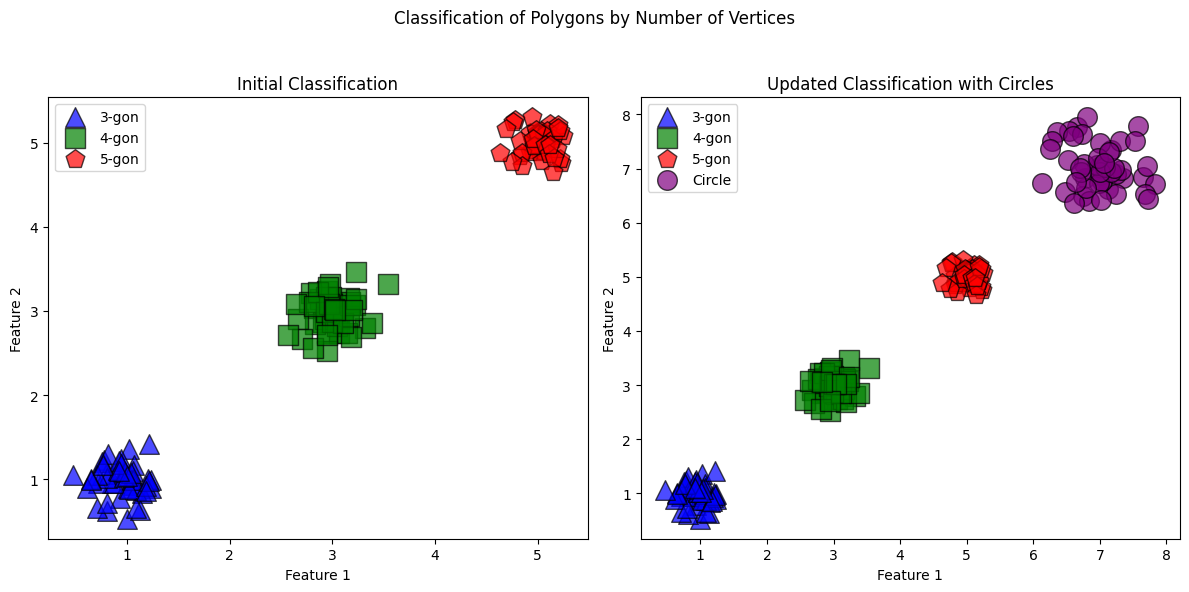

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data with structured placement
def generate_polygon_data(num_samples, num_vertices, label, center, spread=0.5):
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    X = np.zeros((num_samples, 2))
    for i in range(num_samples):
        radius = spread * np.random.randn(num_vertices) + 0.5
        x_poly = radius * np.cos(angles) + center[0]
        y_poly = radius * np.sin(angles) + center[1]
        X[i, 0] = np.mean(x_poly)
        X[i, 1] = np.mean(y_poly)
    y = np.full(num_samples, label)
    return X, y

def generate_circle_data(num_samples, center, spread=1.0):
    X = np.zeros((num_samples, 2))
    for i in range(num_samples):
        angle = np.random.uniform(0, 2 * np.pi)
        radius = spread * np.random.rand()
        X[i, 0] = center[0] + radius * np.cos(angle)
        X[i, 1] = center[1] + radius * np.sin(angle)
    y = np.full(num_samples, 6)
    return X, y

# Initial classes: Triangles, Squares, Pentagons
X_triangles, y_triangles = generate_polygon_data(50, 3, 3, center=[1, 1])
X_squares, y_squares = generate_polygon_data(50, 4, 4, center=[3, 3])
X_pentagons, y_pentagons = generate_polygon_data(50, 5, 5, center=[5, 5])

# Combine data for initial plot
X_initial = np.vstack((X_triangles, X_squares, X_pentagons))
y_initial = np.hstack((y_triangles, y_squares, y_pentagons))

# Plot initial classification
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
markers = {3: '^', 4: 's', 5: 'p'}
colors = {3: 'blue', 4: 'green', 5: 'red'}
for label in np.unique(y_initial):
    plt.scatter(X_initial[y_initial == label][:, 0], X_initial[y_initial == label][:, 1], 
                marker=markers[label], label=f'{label}-gon', color=colors[label], alpha=0.7, edgecolors='k', s=200)
plt.title('Initial Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Add new class: Circles
X_circles, y_circles = generate_circle_data(50, center=[7, 7])
X_updated = np.vstack((X_initial, X_circles))
y_updated = np.hstack((y_initial, y_circles))

# Plot updated classification
plt.subplot(1, 2, 2)
markers = {3: '^', 4: 's', 5: 'p', 6: 'o'}
colors = {3: 'blue', 4: 'green', 5: 'red', 6: 'purple'}

plotted_labels = set()
for point, label in zip(X_updated, y_updated):
    x, y = point
    shape_label = label
    if shape_label not in plotted_labels:
        plt.scatter(x, y, marker=markers[shape_label], color=colors[shape_label], label=f'{shape_label}-gon' if shape_label != 6 else 'Circle', 
                    alpha=0.7, edgecolors='k', s=200)
        plotted_labels.add(shape_label)
    else:
        plt.scatter(x, y, marker=markers[shape_label], color=colors[shape_label], alpha=0.7, edgecolors='k', s=200)

plt.title('Updated Classification with Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')

# Adding an overall title
plt.suptitle('Classification of Polygons by Number of Vertices')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Coming back to the assumptions about the hypothesis space $\mathcal{H}$, the latter is actually very large for some learning methods, such as nearest neighbor classification or (deep) neural networks. Thus, the learner has a high capacity (or "universal approximation" capability) and can express hypotheses in a very flexible way. In such cases, $h^* = f^*$ or at least $h^* \approx f^*$ can safely be assumed. In other words, since the model assumptions are so weak, model uncertainty essentially disappears (at least when disregarding or taking for granted other assumptions as discussed above). Yet, the approximation uncertainty still remains a source of epistemic uncertainty. In fact, this uncertainty tends to be high for methods like nearest neighbors or neural networks, especially if data is sparse.

In the next section, we recall two specific though arguably natural and important approaches for capturing this uncertainty, namely version space learning and Bayesian inference. In version space learning, uncertainty about $h^*$ is represented in terms of a set of possible candidates, whereas in Bayesian learning, this uncertainty is modeled in terms of a probability distribution on $\mathcal{H}$. In both cases, an explicit distinction is made between the uncertainty about $h^*$, and how this uncertainty translates into uncertainty about the outcome for a query $\vec{x}_q$.
